## Dog Breed Classification

<b>Introduction:</b>
<br>
In this project, we aim to develop a classification model to identify the breeds of dogs from images. We will follow a two-fold approach: first, implementing a custom convolutional neural network (CNN) architecture, and second, utilizing pre-trained models such as VGG and ResNet. The objective is to compare the performance of these approaches and draw meaningful insights from the results.

<b>Dataset:</b><br>
The original data is from <a href='http://vision.stanford.edu/aditya86/ImageNetDogs/'>Stanford</a>, and it contains images of many dog breeds. In this project, however, we'll use a <a href='https://drive.google.com/uc?export=download&id=1sj62C-9WKD09-8iYSeEvXmAGQoY2oFFQ'>reduced dataset</a> containing only five breeds. If you want to extend your analysis, feel free to use the original dataset. 

### Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow import keras
from keras import layers, applications
from keras.models import Sequential, Model

In [2]:
tf.random.set_seed(42)

### Load and view dataset

In [3]:
breeds = ['beagle', 'bernese_mountain_dog', 'doberman', 'labrador_retriever', 'siberian_husky']

args = {
    'labels': 'inferred',
    'label_mode': 'categorical',
    'batch_size': 32,
    'image_size': (256, 256),
    'seed': 1,
    'validation_split': 0.2,
    'class_names': breeds
}

In [4]:
train = tf.keras.utils.image_dataset_from_directory(
    'images',
    subset='training',
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
    'images',
    subset='validation',
    **args
)

Found 926 files belonging to 5 classes.
Using 741 files for training.
Found 926 files belonging to 5 classes.
Using 185 files for validation.


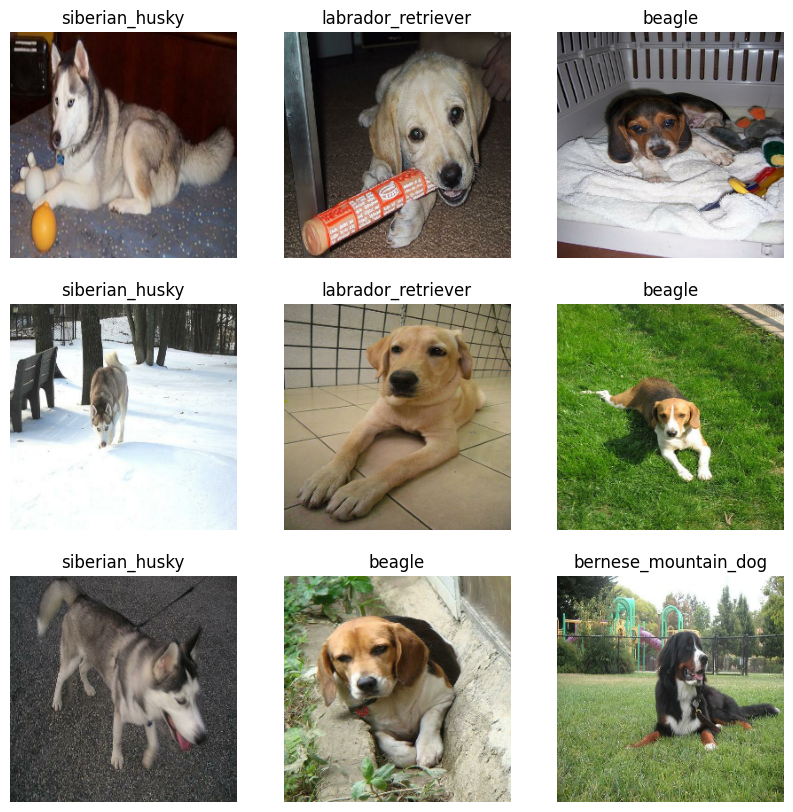

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(breeds[np.where(labels[i].numpy() == 1)[0][0]])
        plt.axis("off")

### Custom CNN Architecture

In [6]:
my_model = Sequential([
    tf.keras.layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(breeds))
])

In [7]:
my_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

my_history = my_model.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)

Epoch 1/10


24/24 [==============================] - 3s 77ms/step - loss: 64.5299 - accuracy: 0.2402 - val_loss: 8.0303 - val_accuracy: 0.1946
Epoch 2/10
24/24 [==============================] - 2s 70ms/step - loss: 3.6436 - accuracy: 0.3846 - val_loss: 2.3097 - val_accuracy: 0.3297
Epoch 3/10
24/24 [==============================] - 2s 69ms/step - loss: 1.1431 - accuracy: 0.5695 - val_loss: 1.8430 - val_accuracy: 0.3027
Epoch 4/10
24/24 [==============================] - 2s 69ms/step - loss: 0.5768 - accuracy: 0.8340 - val_loss: 1.8697 - val_accuracy: 0.3297
Epoch 5/10
24/24 [==============================] - 2s 69ms/step - loss: 0.2097 - accuracy: 0.9636 - val_loss: 1.9952 - val_accuracy: 0.3351
Epoch 6/10
24/24 [==============================] - 2s 69ms/step - loss: 0.0544 - accuracy: 0.9960 - val_loss: 2.3054 - val_accuracy: 0.3027
Epoch 7/10
24/24 [==============================] - 2s 68ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 2.5197 - val_accuracy: 0.3405
Epoch 8/10
24/24 [=====

### VGG16

In [7]:
vgg16 = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape= (256, 256, 3))

for layer in vgg16.layers:
    layer.trainable = False

last_layer = vgg16.layers[-1]

x = layers.Flatten()(last_layer.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)  

x = layers.Dense(units=len(breeds), activation='softmax')(x)

model_vgg = Model(vgg16.input, x, name='VGG16')
model_vgg.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [17]:
model_vgg.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

history = model.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)

Epoch 1/10
24/24 [==============================] - 58s 2s/step - loss: 12.1791 - accuracy: 0.4426 - val_loss: 1.6232 - val_accuracy: 0.4432
Epoch 2/10
24/24 [==============================] - 34s 1s/step - loss: 1.3754 - accuracy: 0.6086 - val_loss: 1.4977 - val_accuracy: 0.5784
Epoch 3/10
24/24 [==============================] - 33s 1s/step - loss: 1.0182 - accuracy: 0.6586 - val_loss: 1.3131 - val_accuracy: 0.5568
Epoch 4/10
24/24 [==============================] - 36s 2s/step - loss: 0.7808 - accuracy: 0.6977 - val_loss: 1.4671 - val_accuracy: 0.4973
Epoch 5/10
24/24 [==============================] - 37s 2s/step - loss: 0.7947 - accuracy: 0.7045 - val_loss: 1.3484 - val_accuracy: 0.5784
Epoch 6/10
24/24 [==============================] - 36s 2s/step - loss: 0.7285 - accuracy: 0.7287 - val_loss: 1.5198 - val_accuracy: 0.6757
Epoch 7/10
24/24 [==============================] - 35s 1s/step - loss: 0.8384 - accuracy: 0.7544 - val_loss: 1.3411 - val_accuracy: 0.6162
Epoch 8/10
24/24 [=

### ResNet50

In [18]:
resnet50 = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape= (256, 256, 3))

for layer in resnet50.layers:
    layer.trainable = False

last_layer = resnet50.layers[-1]

x = layers.Flatten()(last_layer.output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)  

x = layers.Dense(units=len(breeds), activation='softmax')(x)

model_res = Model(resnet50.input, x, name='ResNet50')
model_res.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [19]:
model_res.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

history_res = model.fit(
    train,
    validation_data=test,
    epochs=10,
    verbose=1
)

Epoch 1/10


24/24 [==============================] - 27s 1s/step - loss: 0.4745 - accuracy: 0.7962 - val_loss: 1.1974 - val_accuracy: 0.6324
Epoch 2/10
24/24 [==============================] - 28s 1s/step - loss: 0.5412 - accuracy: 0.8192 - val_loss: 1.0349 - val_accuracy: 0.6486
Epoch 3/10
24/24 [==============================] - 27s 1s/step - loss: 0.4117 - accuracy: 0.8300 - val_loss: 1.2375 - val_accuracy: 0.6270
Epoch 4/10
24/24 [==============================] - 28s 1s/step - loss: 0.5304 - accuracy: 0.8327 - val_loss: 0.9124 - val_accuracy: 0.7027
Epoch 5/10
24/24 [==============================] - 28s 1s/step - loss: 0.3455 - accuracy: 0.8610 - val_loss: 1.1178 - val_accuracy: 0.6811
Epoch 6/10
24/24 [==============================] - 27s 1s/step - loss: 0.3289 - accuracy: 0.8785 - val_loss: 1.9205 - val_accuracy: 0.7027
Epoch 7/10
24/24 [==============================] - 25s 1s/step - loss: 0.4634 - accuracy: 0.8570 - val_loss: 1.5710 - val_accuracy: 0.6108
Epoch 8/10
24/24 [=============

In [5]:
def data_augmenter():
    data_augmentation = Sequential()
    data_augmentation.add(keras.layers.experimental.preprocessing.RandomFlip('horizontal'))
    data_augmentation.add(keras.layers.experimental.preprocessing.RandomRotation(0.2))
    
    return data_augmentation

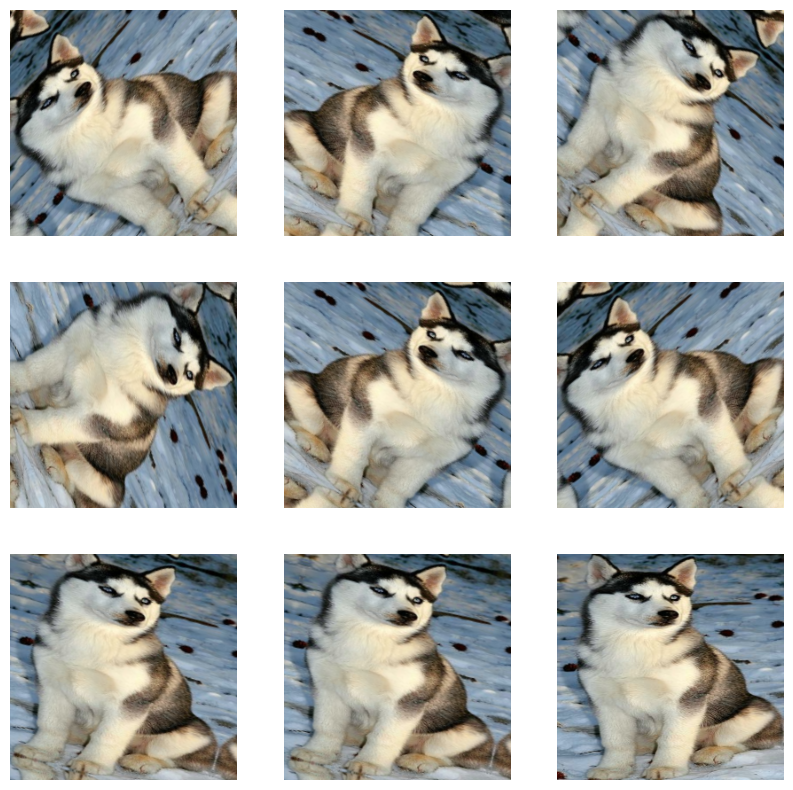

In [6]:
data_augmentation = data_augmenter()

for image, _ in train.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [18]:
resnet50 = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape= (256, 256, 3))

for layer in resnet50.layers:
    layer.trainable = False


input_images = tf.keras.Input(shape=(256, 256, 3))

augmented_images = data_augmenter()(input_images)

x = resnet50(augmented_images)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense(len(breeds), activation='softmax')(x)           

model = Model(input_images, x) 

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               67109376  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2565

In [19]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

history = model.fit(
    train,
    validation_data=test,
    epochs=25,
    verbose=1
)

Epoch 1/25
24/24 [==============================] - 8s 211ms/step - loss: 42.7809 - accuracy: 0.4548 - val_loss: 5.5297 - val_accuracy: 0.7568
Epoch 2/25
24/24 [==============================] - 4s 162ms/step - loss: 3.2253 - accuracy: 0.7935 - val_loss: 1.3664 - val_accuracy: 0.8757
Epoch 3/25
24/24 [==============================] - 4s 160ms/step - loss: 0.8526 - accuracy: 0.8718 - val_loss: 0.7396 - val_accuracy: 0.8486
Epoch 4/25
24/24 [==============================] - 4s 160ms/step - loss: 0.5195 - accuracy: 0.8543 - val_loss: 0.5274 - val_accuracy: 0.8162
Epoch 5/25
24/24 [==============================] - 4s 159ms/step - loss: 0.3520 - accuracy: 0.9015 - val_loss: 0.5604 - val_accuracy: 0.8595
Epoch 6/25
24/24 [==============================] - 4s 163ms/step - loss: 0.2875 - accuracy: 0.9001 - val_loss: 0.5938 - val_accuracy: 0.8595
Epoch 7/25
24/24 [==============================] - 4s 161ms/step - loss: 0.3176 - accuracy: 0.8920 - val_loss: 0.7309 - val_accuracy: 0.8378
Epoch

In [10]:
resnet50 = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape= (256, 256, 3))

for layer in resnet50.layers:
    layer.trainable = False

last_output = resnet50.layers[-1].output

x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.2)(x)     

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)

x = layers.Dense(len(breeds), activation='softmax')(x)           

model = Model(resnet50.input, x) 

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [7]:
augmented_train = train.flat_map(lambda image, label: tf.data.Dataset.from_tensors((data_augmenter()(image), label)).repeat(10))

In [11]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

history = model.fit(
    augmented_train,
    validation_data=test,
    epochs=500,
    verbose=1
)

Epoch 1/500
240/240 [==============================] - 34s 133ms/step - loss: 1.8418 - accuracy: 0.8974 - val_loss: 4.2091 - val_accuracy: 0.7459
Epoch 2/500
240/240 [==============================] - 31s 130ms/step - loss: 0.4825 - accuracy: 0.9410 - val_loss: 1.7949 - val_accuracy: 0.8000
Epoch 3/500
240/240 [==============================] - 31s 130ms/step - loss: 0.2863 - accuracy: 0.9537 - val_loss: 2.0942 - val_accuracy: 0.8378
Epoch 4/500
240/240 [==============================] - 32s 130ms/step - loss: 0.3024 - accuracy: 0.9571 - val_loss: 1.4971 - val_accuracy: 0.8270
Epoch 5/500
240/240 [==============================] - 32s 130ms/step - loss: 0.2274 - accuracy: 0.9629 - val_loss: 3.3454 - val_accuracy: 0.7946
Epoch 6/500
240/240 [==============================] - 32s 130ms/step - loss: 0.2146 - accuracy: 0.9626 - val_loss: 1.0352 - val_accuracy: 0.8649
Epoch 7/500
240/240 [==============================] - 32s 130ms/step - loss: 0.1937 - accuracy: 0.9694 - val_loss: 1.7022 -

KeyboardInterrupt: 

In [80]:
for i, (image, label) in enumerate(augmented_train):
    print(f'{i+1}: {len(image)}')


1: 32
2: 32
3: 32
4: 32
5: 32
6: 32
7: 32
8: 32
9: 32
10: 32
11: 32
12: 32
13: 32
14: 32
15: 32
16: 32
17: 32
18: 32
19: 32
20: 32
21: 32
22: 32
23: 32
24: 32
25: 32
26: 32
27: 32
28: 32
29: 32
30: 32
31: 32
32: 32
33: 32
34: 32
35: 32
36: 32
37: 32
38: 32
39: 32
40: 32
41: 32
42: 32
43: 32
44: 32
45: 32
46: 32
47: 32
48: 32
49: 32
50: 32
51: 32
52: 32
53: 32
54: 32
55: 32
56: 32
57: 32
58: 32
59: 32
60: 32
61: 32
62: 32
63: 32
64: 32
65: 32
66: 32
67: 32
68: 32
69: 32
70: 5
71: 5
72: 5
